In [39]:
import pandas as pd
import io
import requests
url="https://raw.githubusercontent.com/santus444/temp/master/weatherAUS.csv"
s=requests.get(url).content
data=pd.read_csv(io.StringIO(s.decode('utf-8')))
data.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [2]:
# data_na_filled = data.fillna(data.mean())

In [3]:
# data_na_filled.head()

In [4]:
def show_missing(df):
    missing = df.columns[df.isnull().any()].tolist()
    return missing

In [5]:
# data[show_missing(data)].isnull().sum()

In [6]:
data_with_targets = data.dropna(subset=['RainToday', 'RainTomorrow'])

In [7]:
# data_with_targets[show_missing(data_with_targets)].isnull().sum()

In [8]:
# data_with_targets.shape

In [9]:
data_filled = data_with_targets.ffill().bfill()
data_filled[show_missing(data_filled)].isnull().sum()

Series([], dtype: float64)

In [12]:
data_filled['WindGustDir'] = data_filled['WindGustDir'].map({'N':1,'NNE':2,'NE':3,'ENE':4,'E':5,'ESE':6,'SE':7,'SSE':8,'S':9,'SSW':10,'SW':11,'WSW':12,'W':13,'WNW':14,'NW':15,'NNW':16,'N':17})

In [13]:
data_filled['WindDir9am'] = data_filled['WindDir9am'].map({'N':1,'NNE':2,'NE':3,'ENE':4,'E':5,'ESE':6,'SE':7,'SSE':8,'S':9,'SSW':10,'SW':11,'WSW':12,'W':13,'WNW':14,'NW':15,'NNW':16,'N':17})

In [16]:
data_no_na = data.dropna(axis=0, how='any')

In [17]:
data_no_na['WindGustDir'] = data_no_na['WindGustDir'].map({'N':1,'NNE':2,'NE':3,'ENE':4,'E':5,'ESE':6,'SE':7,'SSE':8,'S':9,'SSW':10,'SW':11,'WSW':12,'W':13,'WNW':14,'NW':15,'NNW':16,'N':17})
data_no_na['WindDir9am'] = data_no_na['WindDir9am'].map({'N':1,'NNE':2,'NE':3,'ENE':4,'E':5,'ESE':6,'SE':7,'SSE':8,'S':9,'SSW':10,'SW':11,'WSW':12,'W':13,'WNW':14,'NW':15,'NNW':16,'N':17})
data_no_na['WindDir3pm'] = data_no_na['WindDir3pm'].map({'N':1,'NNE':2,'NE':3,'ENE':4,'E':5,'ESE':6,'SE':7,'SSE':8,'S':9,'SSW':10,'SW':11,'WSW':12,'W':13,'WNW':14,'NW':15,'NNW':16,'N':17})
data_no_na['RainToday'] = data_no_na['RainToday'].map({'No':0, 'Yes':1})
data_no_na['RainTomorrow'] = data_no_na['RainTomorrow'].map({'No':0, 'Yes':1})
data_no_na['Location'] = data_no_na['Location'].map({'AliceSprings':1, 'Brisbane':2, 'Cairns':3, 'Canberra':4, 'Cobar':5, 'CoffsHarbour':6, 'Darwin':7, 'Hobart':8, 'Melbourne':9,'MelbourneAirport':10, 'Mildura':11, 'Moree':12, 'MountGambier':13,'NorfolkIsland':14, 'Nuriootpa':15, 'Perth':16, 'PerthAirport':17, 'Portland':18,'Sale':19, 'Sydney':20, 'SydneyAirport':21, 'Townsville':22, 'WaggaWagga':23,'Watsonia':24, 'Williamtown':25, 'Woomera':26})
# data_no_na


<ipython-input-17-149dedb8825c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_na['WindGustDir'] = data_no_na['WindGustDir'].map({'N':1,'NNE':2,'NE':3,'ENE':4,'E':5,'ESE':6,'SE':7,'SSE':8,'S':9,'SSW':10,'SW':11,'WSW':12,'W':13,'WNW':14,'NW':15,'NNW':16,'N':17})
<ipython-input-17-149dedb8825c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_na['WindDir9am'] = data_no_na['WindDir9am'].map({'N':1,'NNE':2,'NE':3,'ENE':4,'E':5,'ESE':6,'SE':7,'SSE':8,'S':9,'SSW':10,'SW':11,'WSW':12,'W':13,'WNW'

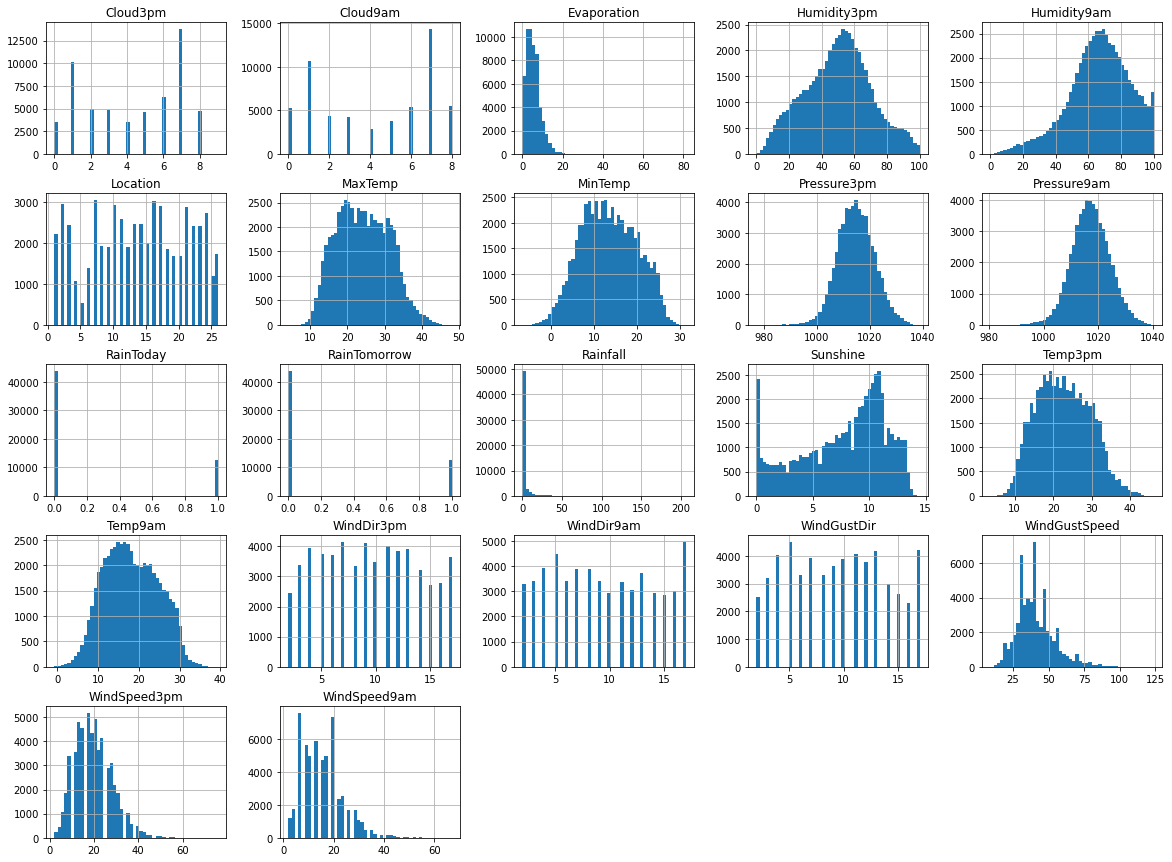

In [18]:
%matplotlib inline 
import matplotlib.pyplot as plt
data_no_na.hist(bins=50, figsize=(20,15))
plt.show()

In [19]:
features_data_no_na = data_no_na.iloc[:,2:22]
target_data_no_na = data_no_na.iloc[:,22]

# target_data_no_na

In [20]:
import numpy as np
# np.sort(data_no_na.Location.unique())
data_no_na.shape

(56420, 23)

In [21]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data_no_na, data_no_na["RainTomorrow"]):
    strat_train_set = data_no_na.iloc[train_index]
    strat_test_set = data_no_na.iloc[test_index]
    

In [22]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("Location", axis=1,  inplace=True)
    set_.drop("Date", axis=1,  inplace=True)


# strat_train_set    

/Users/mandads/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [23]:
import time
def get_score(model, x_train, x_test, y_train, y_test ):
    start_time = time.time()
    model.fit(x_train, y_train)
    elapsed_time = time.time() - start_time
    print("Training time: ",elapsed_time)
    start_time = time.time()
    score = model.score(x_test, y_test)
    elapsed_time = time.time() - start_time
    print("Test time: ",elapsed_time)
    print("Score: ", score)


In [24]:

# iris = load_iris()
# x = iris.data[:,2:]#[:,2:22]
# y = iris.target#[:,22]
x = strat_train_set.iloc[:,:20]
y = strat_train_set.iloc[:,20]


In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectPercentile
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

In [29]:

from sklearn.model_selection import StratifiedKFold
scores=[]
skf = StratifiedKFold(n_splits=10)
for train_index, test_index in skf.split(x, y):
    tree_clf = DecisionTreeClassifier(max_depth=5, min_samples_split=600, ccp_alpha=0)

    x_train = x.iloc[train_index].iloc[:,:20]
    y_train = y.iloc[train_index]
    
    x_test = x.iloc[test_index].iloc[:,:20]
    y_test = y.iloc[test_index]
    current_score = get_score(tree_clf, x_train, x_test, y_train, y_test)
#     print (current_score)
    scores.append(current_score)

print(np.mean(scores, dtype=np.float64))    
# scores

Training time:  0.15861797332763672
Test time:  0.00412297248840332
Score:  0.8511298183429331
Training time:  0.1486358642578125
Test time:  0.00337982177734375
Score:  0.8495790872840053
Training time:  0.14209794998168945
Test time:  0.003384113311767578
Score:  0.8531236154186974
Training time:  0.1505908966064453
Test time:  0.003470897674560547
Score:  0.8433761630482942
Training time:  0.12905097007751465
Test time:  0.0033006668090820312
Score:  0.846699158174568
Training time:  0.14683294296264648
Test time:  0.0035619735717773438
Score:  0.8438192290651307
Training time:  0.1479780673980713
Test time:  0.0034999847412109375
Score:  0.8428982938178595
Training time:  0.1403970718383789
Test time:  0.0034351348876953125
Score:  0.8424551296255263
Training time:  0.13927412033081055
Test time:  0.0031652450561523438
Score:  0.8493241746066917
Training time:  0.14995193481445312
Test time:  0.0033659934997558594
Score:  0.8477730999335253
nan


In [30]:
# strat_train_set.describe()
from sklearn.model_selection import learning_curve

def calculate_learning_curve(train_sizes, data, classifier = DecisionTreeClassifier(max_depth=6, min_samples_split=100), n_jobs=-1):
    features = strat_train_set.columns[:-1]
    target = strat_train_set.columns[-1]
    return learning_curve(
    estimator = classifier,
    X = data[features],
#         X=data_no_na[features],
    y = data[target], 
#     y = data_no_na[target],       strat_train_set
        train_sizes = train_sizes, cv = 5,
    scoring = 'f1', n_jobs=n_jobs)#shuffle=True, random_state=40
    
train_sizes = [1, 100, 500, 2000, 5000, 10000, 20000, 36108]#, 45136]
train_sizes, train_scores, validation_scores = calculate_learning_curve(train_sizes,strat_train_set, DecisionTreeClassifier(max_depth=3, min_samples_split=100))
    

In [31]:
import matplotlib.pyplot as plt
def plot_graphs(title, train_sizes, train_scores, validation_scores):
    train_scores_mean = (train_scores.mean(axis = 1))
    validation_scores_mean = (validation_scores.mean(axis = 1))
    plt.style.use('seaborn')
    plt.plot(train_sizes, train_scores_mean, label = 'Training Score')
    plt.plot(train_sizes, validation_scores_mean, label = 'Validation Score')
    plt.ylabel('Score', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    plt.title(title, fontsize = 18, y = 1.03)
    plt.text(train_sizes[-1], train_scores_mean[-1]+0.01, train_scores_mean[-1])
    plt.text(train_sizes[-1], validation_scores_mean[-1]-0.02, validation_scores_mean[-1])
    plt.legend()
    ylim_max = np.nanmax(validation_scores_mean)+0.1
    ylim_min = np.nanmin(validation_scores_mean)
    plt.ylim(ylim_min, ylim_max)
    print("Training Score: ", train_scores_mean[-1]) 
    print("Cross validation Score: ", validation_scores_mean[-1])
    
def plot_learning_curve(train_sizes,strat_train_set, classifier=DecisionTreeClassifier(max_depth=3, min_samples_split=100), n_jobs=-1):
    train_sizes, train_scores, validation_scores = calculate_learning_curve(train_sizes,strat_train_set, classifier, n_jobs=n_jobs)
    plot_graphs('Learning curve holding out testing data', train_sizes, train_scores, validation_scores)    

In [32]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

def plot_validaiton_curve(data, classifier, param_name, param_range, n_jobs=-1):
    features = data.columns[:-1]
    target = data.columns[-1]
    X = data[features]
    y = data[target]
    train_scores, test_scores = validation_curve(
        classifier, X, y, param_name=param_name, param_range=param_range,
        scoring="f1", verbose=2, n_jobs=n_jobs)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title("Validation Curve")
    plt.xlabel(param_name)
    plt.ylabel("Score")
    y_min = min(np.nanmin(train_scores_mean), np.nanmin(test_scores_mean))
    y_max = max(np.nanmax(test_scores_mean), np.nanmax(train_scores_mean))
    plt.ylim(y_min-0.2, y_max+0.2)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    
#     plt.text(train_sizes[2], train_scores_mean.min(), train_scores_mean[-1])
#     plt.text(train_sizes[2], test_scores_mean.min(), test_scores_mean[-1])
    plt.show()
    
    print("Training Score: ", train_scores_mean[-1]) 
    
    print("Cross validation Score: ", test_scores_mean[-1])    

In [ ]:
#RUN till here

In [33]:
clf = GridSearchCV(DecisionTreeClassifier(), {
    'max_depth': [ 5, 6, 7],
    'min_samples_split':[ 95,96,97,98,99, 100, 101,102, 103, 104, 105, 106, 107, 108, 109, 110]
}, cv=20, return_train_score=False, n_jobs=-1, verbose=3, scoring="f1")
clf.fit(strat_train_set.iloc[:,:20],  strat_train_set.iloc[:,20])
# clf.cv_results_
df = pd.DataFrame(clf.cv_results_)
df

Fitting 20 folds for each of 48 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 256 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 480 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:   23.1s finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,...,split13_test_score,split14_test_score,split15_test_score,split16_test_score,split17_test_score,split18_test_score,split19_test_score,mean_test_score,std_test_score,rank_test_score
0,0.265582,0.030417,0.005895,0.001160,5,95,"{'max_depth': 5, 'min_samples_split': 95}",0.577947,0.603175,0.591885,...,0.560701,0.575610,0.558140,0.600243,0.561315,0.575980,0.599260,0.577220,0.018308,45
1,0.262194,0.021821,0.005858,0.001807,5,96,"{'max_depth': 5, 'min_samples_split': 96}",0.577947,0.603175,0.591885,...,0.560701,0.578049,0.558140,0.600243,0.561315,0.575980,0.599260,0.577342,0.018305,33
2,0.252225,0.007346,0.005350,0.000902,5,97,"{'max_depth': 5, 'min_samples_split': 97}",0.577947,0.603175,0.591885,...,0.560701,0.578049,0.558140,0.600243,0.561315,0.575980,0.599260,0.577342,0.018305,33
3,0.241408,0.005335,0.004776,0.000548,5,98,"{'max_depth': 5, 'min_samples_split': 98}",0.577947,0.603175,0.591885,...,0.560701,0.578049,0.558140,0.600243,0.561315,0.575980,0.599260,0.577342,0.018305,33
4,0.244622,0.006593,0.005623,0.001142,5,99,"{'max_depth': 5, 'min_samples_split': 99}",0.577947,0.603175,0.591885,...,0.560701,0.578049,0.558140,0.600243,0.561315,0.575980,0.599260,0.577342,0.018305,33
5,0.248037,0.012085,0.005145,0.000522,5,100,"{'max_depth': 5, 'min_samples_split': 100}",0.577947,0.603175,0.591885,...,0.560701,0.578049,0.558140,0.600243,0.561315,0.575980,0.599260,0.577342,0.018305,33
6,0.246716,0.008553,0.005192,0.000757,5,101,"{'max_depth': 5, 'min_samples_split': 101}",0.577947,0.603175,0.591885,...,0.560701,0.578049,0.558140,0.600243,0.561315,0.575980,0.599260,0.577342,0.018305,33
7,0.271755,0.025986,0.006157,0.001900,5,102,"{'max_depth': 5, 'min_samples_split': 102}",0.577947,0.603175,0.591885,...,0.560701,0.578049,0.558140,0.600243,0.561315,0.575980,0.599260,0.577342,0.018305,33
8,0.279583,0.017716,0.006797,0.002761,5,103,"{'max_depth': 5, 'min_samples_split': 103}",0.577947,0.603175,0.591885,...,0.560701,0.575610,0.558140,0.600243,0.561315,0.575980,0.599260,0.577220,0.018308,45
9,0.247294,0.006696,0.006005,0.002276,5,104,"{'max_depth': 5, 'min_samples_split': 104}",0.577947,0.603175,0.591885,...,0.560701,0.578049,0.558140,0.600243,0.561315,0.575980,0.599260,0.577342,0.018305,33


In [34]:
df.loc[df['rank_test_score'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,...,split13_test_score,split14_test_score,split15_test_score,split16_test_score,split17_test_score,split18_test_score,split19_test_score,mean_test_score,std_test_score,rank_test_score
19,0.297865,0.006542,0.005254,0.000467,6,98,"{'max_depth': 6, 'min_samples_split': 98}",0.588235,0.639363,0.599287,...,0.589349,0.61745,0.595545,0.622914,0.611241,0.58283,0.599532,0.601893,0.019689,1
22,0.358014,0.008802,0.006280,0.000970,6,101,"{'max_depth': 6, 'min_samples_split': 101}",0.588235,0.639363,0.599287,...,0.589349,0.61745,0.595545,0.622914,0.611241,0.58283,0.599532,0.601893,0.019689,1


In [35]:
strat_test_set.iloc[0,:20]

MinTemp            11.3
MaxTemp            23.1
Rainfall            0.0
Evaporation         5.0
Sunshine           10.5
WindGustDir         8.0
WindGustSpeed      26.0
WindDir9am          5.0
WindDir3pm          6.0
WindSpeed9am       11.0
WindSpeed3pm        9.0
Humidity9am        62.0
Humidity3pm        36.0
Pressure9am      1024.0
Pressure3pm      1020.3
Cloud9am            1.0
Cloud3pm            0.0
Temp9am            15.2
Temp3pm            22.5
RainToday           0.0
Name: 122000, dtype: float64

Training Score:  0.612268677944664
Cross validation Score:  0.5981048723555875


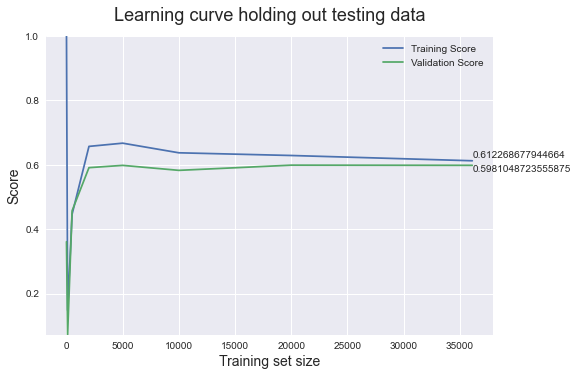

In [75]:
plot_learning_curve(train_sizes,strat_train_set, DecisionTreeClassifier(max_depth=6, min_samples_split=101))

In [54]:
(1-train_scores.mean(axis = 1))-(1-validation_scores.mean(axis = 1))

array([-6.38984717e-01, -7.65683120e-02,  1.04794970e-02, -2.02989471e-02,
       -2.88706062e-02, -1.06844671e-02, -3.39602552e-03, -3.41329318e-05])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  30 | elapsed:    0.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.7s finished


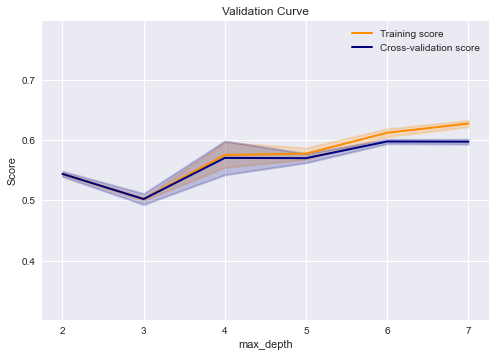

Training Score:  0.6272603209369425
Cross validation Score:  0.5972502805827142


In [77]:
plot_validaiton_curve(strat_train_set, DecisionTreeClassifier(min_samples_split=100), "max_depth", [2,3,4, 5, 6, 7])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  70 | elapsed:    0.9s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    1.5s finished


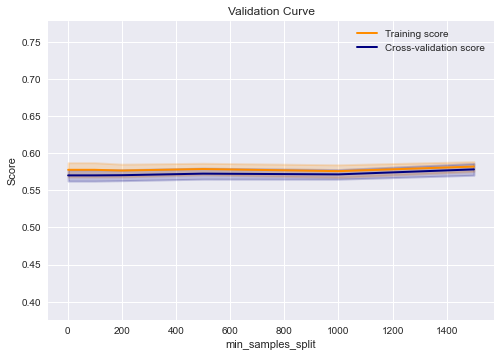

Training Score:  0.5818128146546556
Cross validation Score:  0.5780107999409487


In [78]:
plot_validaiton_curve(strat_train_set, DecisionTreeClassifier(max_depth=5), "min_samples_split", [2,3, 5, 10, 15, 20,25,  50, 75,100, 200, 500, 1000, 1500])

In [38]:
tree_final = DecisionTreeClassifier(max_depth=4)

get_score(tree_final, strat_train_set.iloc[:,:20], strat_test_set.iloc[:,:20], strat_train_set.iloc[:,20], strat_test_set.iloc[:,20])
# tree_clf.score(strat_test_set.iloc[:,:20], strat_test_set.iloc[:,20])
# strat_test_set

Training time:  0.1627640724182129
Test time:  0.009452104568481445
Score:  0.8450903934774903


In [34]:

clf = GridSearchCV(MLPClassifier(), {
    'activation': ['logistic', 'sgd'],
    'solver':['adam'],
    'hidden_layer_sizes':[(300,400),(300)], #did search for 100, 200, 400, 500, 600
    'learning_rate': ['adaptive'],
    'learning_rate_init': [0.001],
    'max_iter': [5000],
    'momentum': [0.1],
    'alpha':[0.00001], 
    'random_state':[42],
    'warm_start':[True]
}, cv=5, return_train_score=False, verbose=3, n_jobs=-1, scoring="f1")
clf.fit(strat_train_set.iloc[:,:20],  strat_train_set.iloc[:,20])
df = pd.DataFrame(clf.cv_results_)
df


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  20 | elapsed:    2.3s remaining:   12.9s
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:    2.5s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  17 out of  20 | elapsed:  1.7min remaining:   17.8s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.9min finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,param_hidden_layer_sizes,param_learning_rate,param_learning_rate_init,param_max_iter,...,param_warm_start,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,98.160347,14.550229,0.158963,0.020843,logistic,1e-05,"(300, 400)",adaptive,0.001,5000,...,True,"{'activation': 'logistic', 'alpha': 1e-05, 'hi...",0.602307,0.593616,0.598397,0.587043,0.580346,0.592342,0.007869,1
1,28.572124,6.458430,0.100940,0.006878,logistic,1e-05,300,adaptive,0.001,5000,...,True,"{'activation': 'logistic', 'alpha': 1e-05, 'hi...",0.574786,0.569361,0.626584,0.505183,0.633205,0.581824,0.046308,2
2,0.021917,0.002569,0.000000,0.000000,sgd,1e-05,"(300, 400)",adaptive,0.001,5000,...,True,"{'activation': 'sgd', 'alpha': 1e-05, 'hidden_...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,0.030278,0.008299,0.000000,0.000000,sgd,1e-05,300,adaptive,0.001,5000,...,True,"{'activation': 'sgd', 'alpha': 1e-05, 'hidden_...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,4


In [80]:
#300: 0.850452, 300,200: 0.850005, 
#        less number of hidden layers performed bad. 
#        but same time increasing it beyond 2 also performed bad. 
        
#        in 2 when we changed the number perceptons found (300, 400) 0.850230

Training Score:  0.6318797008672004
Cross validation Score:  0.6262402963226251


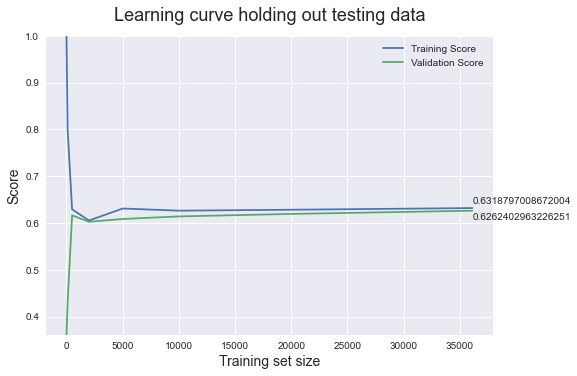

In [35]:
plot_learning_curve(train_sizes,strat_train_set, MLPClassifier(activation='logistic',solver='adam',learning_rate='adaptive',learning_rate_init= 0.0001,max_iter=5000,momentum=0.1, warm_start=True, hidden_layer_sizes=(300,400),alpha=0.00001))

Training Score:  0.6325428050350053
Cross validation Score:  0.6300803699259072


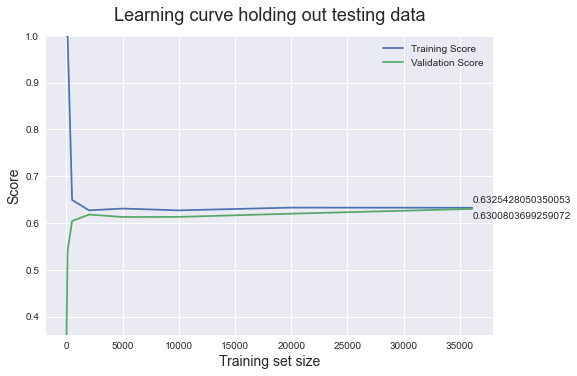

In [34]:
plot_learning_curve(train_sizes,strat_train_set, MLPClassifier(activation='logistic',solver='adam',learning_rate='adaptive',learning_rate_init= 0.0001,max_iter=5000,momentum=0.1, warm_start=False,hidden_layer_sizes=(300,400),alpha=0.00001))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:  1.1min remaining:   55.5s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.3min finished


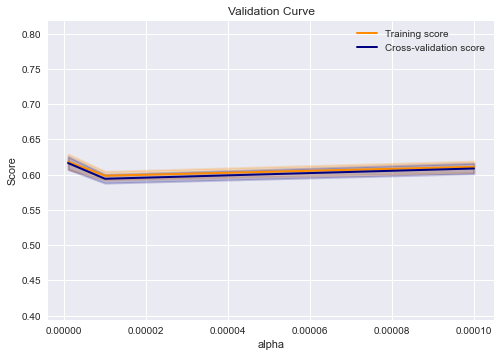

Training Score:  0.6111414326586881
Cross validation Score:  0.608771596234122


In [39]:
plot_validaiton_curve(strat_train_set, MLPClassifier(activation='logistic',solver='adam',learning_rate='adaptive',learning_rate_init= 0.0001,max_iter=5000,momentum=0.1, warm_start=True), "alpha", [ 0.000001,  0.00001, 0.0001])

In [85]:
#  plot_validaiton_curve(strat_train_set, MLPClassifier(activation='logistic',solver='adam',learning_rate='adaptive',learning_rate_init= 0.0001,max_iter=5000,momentum=0.1, warm_start=True, alpha=0.0000001), "hidden_layer_sizes", [(300,), (300, 400)])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed: 22.7min remaining: 19.9min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 27.1min finished


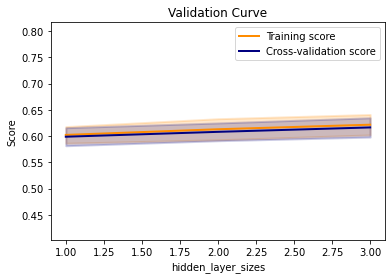

Training Score:  0.6217514965684512
Cross validation Score:  0.6165549567136255


In [33]:
    features = strat_train_set.columns[:-1]
    target = strat_train_set.columns[-1]
    X = strat_train_set[features]
    y = strat_train_set[target]
    train_scores, test_scores = validation_curve(
        MLPClassifier(activation='logistic',solver='adam',learning_rate='adaptive',learning_rate_init= 0.0001,max_iter=5000,momentum=0.1, warm_start=True, alpha=0.0000001)
        , X, y, param_name="hidden_layer_sizes", param_range=[(300, 400), (300, 500), (300, 500, 200)],
        scoring="f1", verbose=2, n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title("Validation Curve")
    plt.xlabel("hidden_layer_sizes")
    plt.ylabel("Score")
    plt.ylim(train_scores_mean.min()-0.2, test_scores_mean.max()+0.2)
    lw = 2
    plt.plot([1, 2, 3], train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between([1, 2,3], train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.plot([1, 2, 3], test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between([1, 2, 3], test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    
#     plt.text(train_sizes[2], train_scores_mean.min(), train_scores_mean[-1])
#     plt.text(train_sizes[2], test_scores_mean.min(), test_scores_mean[-1])
    plt.show()
    
    print("Training Score: ", train_scores_mean[-1]) 
    
    print("Cross validation Score: ", test_scores_mean[-1]) 

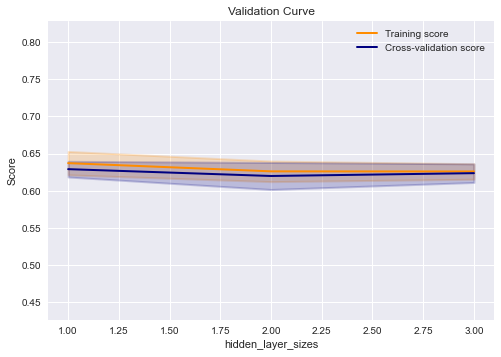

Training Score:  0.6258453311792056
Cross validation Score:  0.6235745346688257


In [37]:
    plt.title("Validation Curve")
    plt.xlabel("hidden_layer_sizes")
    plt.ylabel("Score")
    plt.ylim(train_scores_mean.min()-0.2, test_scores_mean.max()+0.2)
    lw = 2
    plt.plot([1, 2, 3], train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between([1, 2, 3], train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.plot([1, 2, 3], test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between([1, 2, 3], test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    
#     plt.text(train_sizes[2], train_scores_mean.min(), train_scores_mean[-1])
#     plt.text(train_sizes[2], test_scores_mean.min(), test_scores_mean[-1])
    plt.show()
    
    print("Training Score: ", train_scores_mean[-1]) 
    
    print("Cross validation Score: ", test_scores_mean[-1]) 

In [38]:
mlp_final = MLPClassifier(activation='logistic',solver='adam',learning_rate='adaptive',learning_rate_init= 0.0001,
               max_iter=5000,momentum=0.1, warm_start=False,hidden_layer_sizes=(300,400),alpha=0.00001)
get_score(mlp_final, strat_train_set.iloc[:,:20], strat_test_set.iloc[:,:20], strat_train_set.iloc[:,20], strat_test_set.iloc[:,20])

#hidden layer (100,) score 0.8505848989719957


Training time:  160.74236178398132
Test time:  0.14486289024353027
Score:  0.8555476781283233


In [88]:

clf = GridSearchCV(AdaBoostClassifier(), {
    'n_estimators': [  500], 
    'learning_rate' : [ 0.6, 0.7, 0.8],
    'algorithm': [ 'SAMME.R'],
    'random_state':[42]
}, cv=5, return_train_score=False, verbose=3, scoring='f1', n_jobs=-1)
clf.fit(strat_train_set.iloc[:,:20],  strat_train_set.iloc[:,20])
df = pd.DataFrame(clf.cv_results_)
df


Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  15 | elapsed:   41.4s remaining:  4.5min
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:   41.5s remaining:   36.3s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   41.7s finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_learning_rate,param_n_estimators,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,35.840028,0.104848,1.985250,0.025285,SAMME.R,0.6,500,42,"{'algorithm': 'SAMME.R', 'learning_rate': 0.6,...",0.629876,0.619034,0.628854,0.624783,0.625906,0.625690,0.003813,1
1,35.911758,0.116058,1.989247,0.059419,SAMME.R,0.7,500,42,"{'algorithm': 'SAMME.R', 'learning_rate': 0.7,...",0.629876,0.616550,0.629683,0.624134,0.620308,0.624110,0.005214,3
2,35.824960,0.191527,2.018593,0.077837,SAMME.R,0.8,500,42,"{'algorithm': 'SAMME.R', 'learning_rate': 0.8,...",0.627927,0.624093,0.628555,0.622299,0.620949,0.624765,0.003015,2


In [158]:
#0.855836:1, 0.856456:0.5, 0.856700:0.4:500:SAMME.R, 0.857209:0.6:500

In [ ]:
plot_learning_curve(train_sizes,strat_train_set, AdaBoostClassifier(n_estimators=500, learning_rate=0.6))

Training Score:  0.6295097331871202
Cross validation Score:  0.6237603381715081


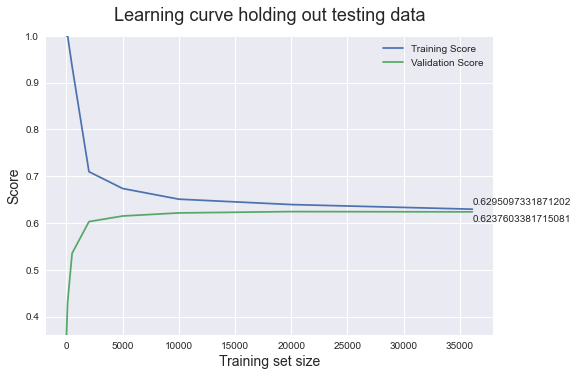

In [90]:
# plot_learning_curve(train_sizes,strat_train_set, AdaBoostClassifier(n_estimators=400, learning_rate=0.4))

In [ ]:
plot_learning_curve(train_sizes,strat_train_set, AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=500, learning_rate=0.6))

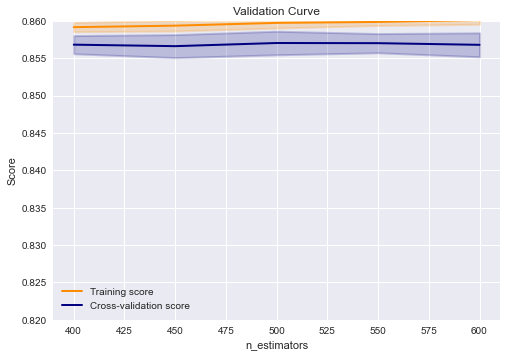

Training Score:  0.8601116587096558
Cross validation Score:  0.8567883461317912


In [150]:
# plot_validaiton_curve(strat_train_set, AdaBoostClassifier(learning_rate=0.4), "n_estimators", [400, 450,500,550,600])

In [ ]:
plot_validaiton_curve(strat_train_set, AdaBoostClassifier(learning_rate=0.6), "n_estimators", [300, 350, 400, 450,500,550,600], n_jobs=-1)

In [93]:
ab_final = AdaBoostClassifier(n_estimators=400, learning_rate=0.4)
get_score(ab_final, strat_train_set.iloc[:,:20], strat_test_set.iloc[:,:20], strat_train_set.iloc[:,20], strat_test_set.iloc[:,20])



Training time:  13.291411876678467
Test time:  0.39554309844970703
Score:  0.8549273307337824


In [35]:
p = Pipeline([('scaler', Normalizer()),
('model', KNeighborsClassifier())])
hyperparams = {
'model__n_neighbors' : [ 7,8, 9, 10],
'model__n_jobs':[-1],
    'model__weights':["distance"],
    'model__p':[1,2]
 }

clf = GridSearchCV(p,hyperparams, cv=5, return_train_score=False, verbose=3, n_jobs=-1, scoring="f1")
clf.fit(strat_train_set.iloc[:,:20],  strat_train_set.iloc[:,20])
df = pd.DataFrame(clf.cv_results_)
df



Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  40 | elapsed:   42.4s remaining:   31.4s
[Parallel(n_jobs=-1)]: Done  37 out of  40 | elapsed:   52.0s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   52.8s finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_jobs,param_model__n_neighbors,param_model__p,param_model__weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,8.423202,0.495191,15.279791,0.643442,-1,7,1,distance,"{'model__n_jobs': -1, 'model__n_neighbors': 7,...",0.591659,0.595231,0.601947,0.590337,0.590949,0.594025,0.004310,4
1,10.811572,1.309844,5.955284,1.288277,-1,7,2,distance,"{'model__n_jobs': -1, 'model__n_neighbors': 7,...",0.582864,0.579824,0.594611,0.584158,0.586550,0.585601,0.005000,8
2,12.937145,0.321452,14.827961,0.271421,-1,8,1,distance,"{'model__n_jobs': -1, 'model__n_neighbors': 8,...",0.600956,0.597895,0.603024,0.594563,0.590125,0.597312,0.004592,1
3,12.718032,1.639249,3.637713,2.175904,-1,8,2,distance,"{'model__n_jobs': -1, 'model__n_neighbors': 8,...",0.586484,0.577251,0.598109,0.582507,0.589474,0.586765,0.006996,7
4,9.033012,0.531558,12.382858,0.072030,-1,9,1,distance,"{'model__n_jobs': -1, 'model__n_neighbors': 9,...",0.588057,0.595990,0.597301,0.596165,0.593506,0.594204,0.003314,3
5,9.425571,0.555117,4.724802,0.765629,-1,9,2,distance,"{'model__n_jobs': -1, 'model__n_neighbors': 9,...",0.592125,0.578077,0.598745,0.583085,0.592062,0.588819,0.007324,5
6,11.283770,1.385768,9.811957,1.556175,-1,10,1,distance,"{'model__n_jobs': -1, 'model__n_neighbors': 10...",0.595411,0.593179,0.604011,0.595415,0.594903,0.596584,0.003803,2
7,10.617268,1.384153,2.203544,0.880579,-1,10,2,distance,"{'model__n_jobs': -1, 'model__n_neighbors': 10...",0.587988,0.584277,0.597852,0.579261,0.591976,0.588271,0.006368,6


Training Score:  1.0
Cross validation Score:  0.5973124928986524


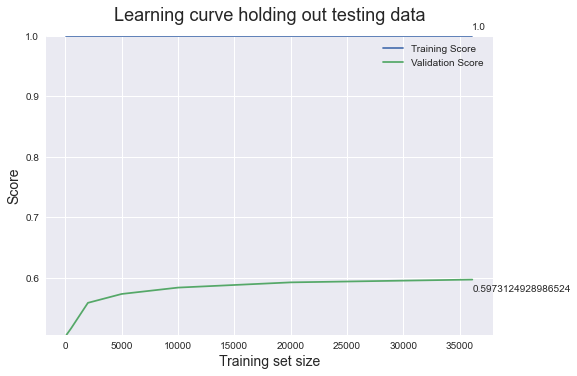

In [36]:
p = Pipeline([('scaler', Normalizer()),
('model', KNeighborsClassifier(n_neighbors=8, weights='distance', p=1, n_jobs=-1))])

plot_learning_curve(train_sizes[1:],strat_train_set, p)

In [100]:
train_sizes[1:]

array([  100,   500,  2000,  5000, 10000, 20000, 36108])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  30 | elapsed:  2.7min remaining:  2.7min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  4.9min finished


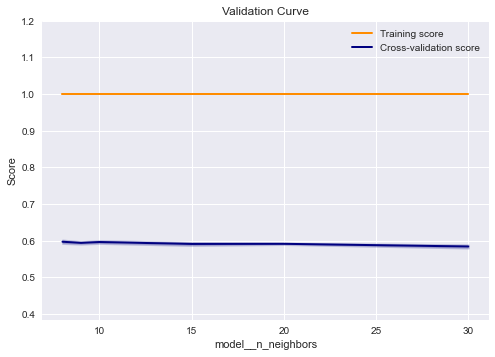

Training Score:  1.0
Cross validation Score:  0.5843780738912858


In [37]:
p = Pipeline([('scaler', Normalizer()),
('model', KNeighborsClassifier(weights='distance', p=1, n_jobs=-1))])
plot_validaiton_curve(strat_train_set, p, "model__n_neighbors", [8, 9, 10, 15, 20,30], n_jobs=-1)

In [37]:
knn_final = KNeighborsClassifier(weights='distance', p=1, n_neighbors=8, n_jobs=-1)
get_score(knn_final, strat_train_set.iloc[:,:20], strat_test_set.iloc[:,:20], strat_train_set.iloc[:,20], strat_test_set.iloc[:,20])



Training time:  0.9331440925598145
Test time:  3.458629846572876
Score:  0.8535980148883374


In [33]:
p = Pipeline([('scaler', Normalizer()),
('model', SVC())])
hyperparams = {
'model__C':[20,40, 100],
'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
 }

clf = GridSearchCV(p,hyperparams, cv=5, return_train_score=False, verbose=3, n_jobs=-1, scoring="f1")
clf.fit(strat_train_set.iloc[:,:20],  strat_train_set.iloc[:,20])
df = pd.DataFrame(clf.cv_results_)
df

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of  75 | elapsed:  7.6min remaining:   32.7s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  7.7min finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__C,param_model__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,94.896611,0.299770,10.417479,0.232280,20,linear,"{'model__C': 20, 'model__kernel': 'linear'}",0.569520,0.576347,0.576101,0.563309,0.568240,0.570703,0.004962,10
1,100.544052,0.376346,10.287116,0.147559,20,poly,"{'model__C': 20, 'model__kernel': 'poly'}",0.586485,0.593536,0.590325,0.579951,0.583824,0.586824,0.004768,6
2,114.434508,0.646152,14.004481,0.322987,20,rbf,"{'model__C': 20, 'model__kernel': 'rbf'}",0.582658,0.587312,0.585290,0.575598,0.578306,0.581833,0.004335,7
3,128.933387,0.272289,15.858159,0.870906,20,sigmoid,"{'model__C': 20, 'model__kernel': 'sigmoid'}",0.550132,0.548890,0.545455,0.540753,0.552953,0.547636,0.004200,12
4,0.069964,0.003078,0.000000,0.000000,20,precomputed,"{'model__C': 20, 'model__kernel': 'precomputed'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
5,99.924471,0.380493,11.399119,0.213195,40,linear,"{'model__C': 40, 'model__kernel': 'linear'}",0.580181,0.587606,0.585834,0.574891,0.578668,0.581436,0.004679,9
6,108.034043,1.290049,10.102621,0.732478,40,poly,"{'model__C': 40, 'model__kernel': 'poly'}",0.588126,0.593488,0.593137,0.584125,0.586090,0.588993,0.003749,4
7,121.197094,1.904623,14.408994,0.347519,40,rbf,"{'model__C': 40, 'model__kernel': 'rbf'}",0.587105,0.593468,0.590254,0.580129,0.583385,0.586868,0.004746,5
8,126.011194,0.707904,14.608114,0.438203,40,sigmoid,"{'model__C': 40, 'model__kernel': 'sigmoid'}",0.563888,0.569132,0.571248,0.561805,0.565482,0.566311,0.003441,11
9,0.069535,0.003004,0.000000,0.000000,40,precomputed,"{'model__C': 40, 'model__kernel': 'precomputed'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,14


In [34]:
p = Pipeline([('scaler', Normalizer()),
('model', SVC())])
hyperparams = {
'model__C':[1, 5, 10],
'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
 }

clf = GridSearchCV(p,hyperparams, cv=5, return_train_score=False, verbose=3, n_jobs=-1, scoring="f1")
clf.fit(strat_train_set.iloc[:,:20],  strat_train_set.iloc[:,20])
df = pd.DataFrame(clf.cv_results_)
df

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of  75 | elapsed:  8.5min remaining:   36.4s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  8.6min finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__C,param_model__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,115.052920,0.619610,13.908045,0.126914,1,linear,"{'model__C': 1, 'model__kernel': 'linear'}",0.073430,0.077183,0.071429,0.088207,0.080847,0.078219,0.005946,11
1,117.247747,0.797229,13.357275,0.118164,1,poly,"{'model__C': 1, 'model__kernel': 'poly'}",0.525349,0.522485,0.521710,0.519120,0.530112,0.523755,0.003748,7
2,138.136250,0.542534,18.290309,0.133000,1,rbf,"{'model__C': 1, 'model__kernel': 'rbf'}",0.443783,0.435011,0.457559,0.446566,0.454613,0.447506,0.008030,9
3,148.184175,3.218935,18.388963,0.859565,1,sigmoid,"{'model__C': 1, 'model__kernel': 'sigmoid'}",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12
4,0.074456,0.000792,0.000000,0.000000,1,precomputed,"{'model__C': 1, 'model__kernel': 'precomputed'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
5,114.321491,0.808090,13.196410,0.051287,5,linear,"{'model__C': 5, 'model__kernel': 'linear'}",0.526958,0.531154,0.527731,0.521241,0.533514,0.528120,0.004174,6
6,115.512625,1.011741,11.985097,0.355077,5,poly,"{'model__C': 5, 'model__kernel': 'poly'}",0.570976,0.576617,0.578947,0.566489,0.572063,0.573018,0.004378,3
7,128.830579,4.049990,16.424899,0.151289,5,rbf,"{'model__C': 5, 'model__kernel': 'rbf'}",0.563472,0.561324,0.566038,0.555199,0.562278,0.561662,0.003597,4
8,139.350322,1.362801,15.336664,1.551260,5,sigmoid,"{'model__C': 5, 'model__kernel': 'sigmoid'}",0.399844,0.383046,0.409943,0.406883,0.399226,0.399788,0.009318,10
9,0.073469,0.007518,0.000000,0.000000,5,precomputed,"{'model__C': 5, 'model__kernel': 'precomputed'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,14


In [39]:
p = Pipeline([('scaler', Normalizer()),
('model', SVC())])
hyperparams = {
'model__C':[100, 150, 200],
'model__kernel': ['poly'],
    'model__degree':[4, 5, 6]
 }

clf = GridSearchCV(p,hyperparams, cv=5, return_train_score=False, verbose=3, n_jobs=-1, scoring="f1")
clf.fit(strat_train_set.iloc[:,:20],  strat_train_set.iloc[:,20])
df = pd.DataFrame(clf.cv_results_)
df

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  45 | elapsed:  4.4min remaining:  2.2min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  6.0min finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__C,param_model__degree,param_model__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,119.111399,1.061718,12.617984,0.101570,100,4,poly,"{'model__C': 100, 'model__degree': 4, 'model__...",0.591881,0.593633,0.590741,0.584131,0.592984,0.590674,0.003417,1
1,120.518120,0.411061,12.740928,0.147544,100,5,poly,"{'model__C': 100, 'model__degree': 5, 'model__...",0.585396,0.589784,0.586185,0.583152,0.591945,0.587293,0.003156,4
2,120.594899,1.474931,12.732096,0.166241,100,6,poly,"{'model__C': 100, 'model__degree': 6, 'model__...",0.581601,0.586305,0.582318,0.584375,0.589599,0.584839,0.002894,6
3,113.761714,2.345901,11.582918,0.438540,150,4,poly,"{'model__C': 150, 'model__degree': 4, 'model__...",0.590838,0.593009,0.588345,0.581965,0.592224,0.589276,0.003985,2
4,113.353802,0.698017,11.189460,0.162676,150,5,poly,"{'model__C': 150, 'model__degree': 5, 'model__...",0.583202,0.587347,0.583463,0.582943,0.591805,0.585752,0.003430,5
5,113.987739,0.871108,10.867328,0.117209,150,6,poly,"{'model__C': 150, 'model__degree': 6, 'model__...",0.580278,0.585935,0.581009,0.580746,0.588972,0.583388,0.003464,9
6,100.948065,10.064538,9.308143,1.481271,200,4,poly,"{'model__C': 200, 'model__degree': 4, 'model__...",0.589230,0.590852,0.586700,0.582090,0.592269,0.588228,0.003584,3
7,93.621117,0.526834,6.706055,0.369037,200,5,poly,"{'model__C': 200, 'model__degree': 5, 'model__...",0.583412,0.585642,0.581330,0.582421,0.590297,0.584621,0.003175,7
8,94.181985,0.963826,4.981976,0.709560,200,6,poly,"{'model__C': 200, 'model__degree': 6, 'model__...",0.583149,0.586011,0.581009,0.581373,0.589896,0.584288,0.003316,8


Training Score:  0.5908106591779523
Cross validation Score:  0.590761168809854


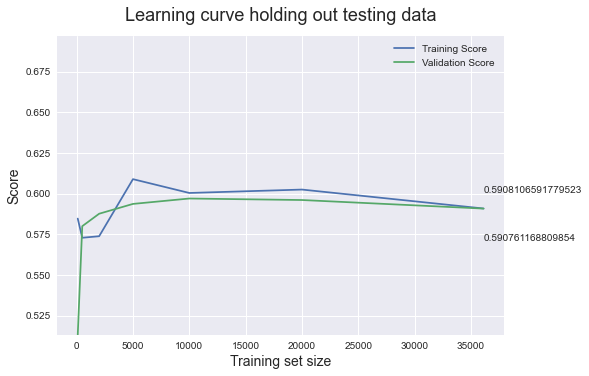

In [33]:
p = Pipeline([('scaler', Normalizer()),
('model', SVC(C=100, kernel='poly', degree=4))])

plot_learning_curve(train_sizes,strat_train_set, p)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:  2.7min remaining:  2.7min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  3.5min finished


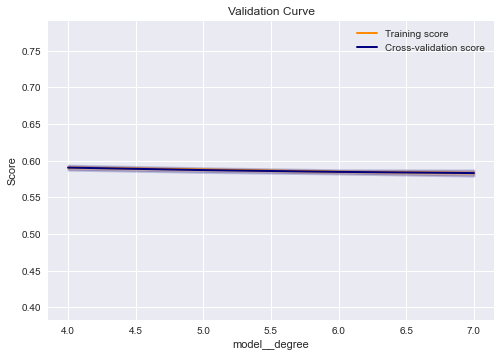

Training Score:  0.5834479116454986
Cross validation Score:  0.5832161836233192


In [35]:
p = Pipeline([('scaler', Normalizer()),
('model', SVC(C=100, kernel='poly'))])
plot_validaiton_curve(strat_train_set, p, "model__degree", [4, 5, 6, 7], n_jobs=-1)

Training Score:  0.571494506673387
Cross validation Score:  0.5707030951094129


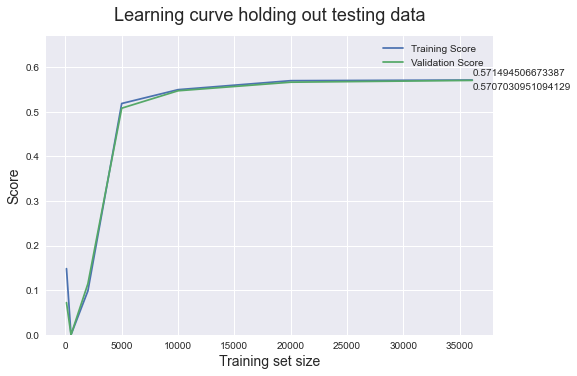

In [36]:
p = Pipeline([('scaler', Normalizer()),
('model', SVC(C=20, kernel='linear'))])

plot_learning_curve(train_sizes,strat_train_set, p)

In [36]:
svc_final = SVC(C=100, kernel='poly', degree=4)
get_score(svc_final, strat_train_set.iloc[:,:20], strat_test_set.iloc[:,:20], strat_train_set.iloc[:,20], strat_test_set.iloc[:,20])



Training time:  21.92755627632141
Test time:  2.5682733058929443
Score:  0.8544842254519673


In [34]:
svc_final = SVC(C=10, kernel='linear')
get_score(svc_final, strat_train_set.iloc[:,:20], strat_test_set.iloc[:,:20], strat_train_set.iloc[:,20], strat_test_set.iloc[:,20])




Training time:  186.75407791137695
Test time:  1.5922620296478271
Score:  0.8525345622119815
